In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
final_df = pd.read_csv('final.csv')
out_of_sample = pd.read_csv('Out_of_Sample.csv')
out_of_sample = out_of_sample.drop(['Visitor-Points', 'Home-Points'], 1)
final_df = final_df.drop(['Visitor-Points', 'Home-Points'], 1)

In [3]:
final_df.sample(10)

Overtime  Age_Visitor  W_Visitor  L_Visitor  PW_Visitor  PL_Visitor  \
3968         0         25.2         40         42          42          40   
2970         0         23.9         35         47          36          46   
1850         0         24.3         25         57          25          57   
3601         0         26.8         51         31          52          30   
5594         0         26.7         48         34          53          29   
3054         0         28.1         57         25          57          25   
3930         0         25.7         34         48          35          47   
2243         0         26.9         45         37          46          36   
1344         0         28.5         37         45          33          49   
4803         0         25.9         44         38          40          42   

      MOV_Visitor  SOS_Visitor  SRS_Visitor  ORtg_Visitor       ...        \
3968         0.51         0.19         0.70         113.2       ...         
2970        -1.62        -0.06        -1.68         105.1       ...         
1850        -5.72        -0.15        -5.87         101.6       ...         
3601         3.94         0.06         4.00         109.6       ...         
5594         4.30         0.17         4.47         108.4       ...         
3054         6.00        -0.55         5.45         110.9       ...         
3930        -2.10         0.41        -1.69         105.2       ...         
2243         1.71        -0.09         1.62         104.6       ...         
1344        -2.60        -0.32        -2.92         103.9       ...         
4803        -0.30        -0.15        -0.45         109.8       ...         

      T_DRB_Home  T_TRB_Home  T_AST_Home  T_STL_Home  T_BLK_Home  T_TOV_Home  \
3968        32.1        43.5        20.9         8.2         3.9        15.2   
2970        36.2        46.2        28.9         8.4         6.1        15.2   
1850        29.3        40.9        21.6         8.1         4.0        15.0   
3601        31.0        42.4        23.7         8.0         4.5        14.0   
5594        31.4        40.9        21.6         7.8         4.1        13.7   
3054        33.0        43.3        23.6         8.2         5.1        14.1   
3930        35.1        43.9        21.4         7.2         4.7        16.5   
2243        32.8        41.8        24.5         8.6         3.9        14.5   
1344        34.1        44.1        20.2         6.1         5.5        11.9   
4803        33.7        42.1        23.4         7.1         3.8        13.7   

      T_PF_Home  T_PTS_Home    elo_diff  score_gap_sign  
3968       20.7       104.6 -127.366029              -6  
2970       20.7       114.9  398.024741               6  
1850       19.2        97.8  -15.135740             -13  
3601       20.1       105.6 -136.778835              -9  
5594       20.0        98.8 -225.804022              -7  
3054       20.7       102.1 -269.161086              -6  
3930       21.0       105.8 -189.684209              -9  
2243       20.8       104.1   -8.893941             -17  
1344       18.2        94.2  -28.277340               2  
4803       18.6       110.9  123.157748               5  

[10 rows x 135 columns]

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
X = final_df.drop(['score_gap_sign'], axis = 1)
y = final_df['score_gap_sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)

In [6]:
lassoreg = linear_model.Lasso(alpha=1)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)
print(lassoreg.intercept_)
pred = lassoreg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
print(error)

[-0.00000000e+00  0.00000000e+00  8.93559367e-03 -0.00000000e+00
 -1.62739305e-01  1.43430284e-15 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.96481101e-01 -3.52067887e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.17467908e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [7]:
# out-of-sample prediction
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
lassoreg.fit(X,y)
pred = lassoreg.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(pred)
print(error)

[ 1.96585181  5.13591976 -1.5537923   2.65708919  2.26987952  7.4281537
 -1.09951493  0.64437457 -3.50360474 -0.93724605 -5.14610524  2.18543151
  1.23799412  6.42537838  3.63866099 -0.20548532  1.18760754  0.02814541
  0.11178111  0.18843944 -1.26193188  6.06969734 -3.18798825  0.45118402
 -2.71807023 -2.72032173 -3.67873117  8.77671155  5.68816894 -5.39494182
  0.70794927 -6.59658263  7.28158696  1.04405852 -3.67597855  5.77631018
 -2.81122432 -2.64787324  3.87130101  7.75800768  0.92216158 12.54736597
 -2.68127715  6.05317943 -0.84697988  2.94799886  4.6771249   7.12829457
  5.68878601 -2.05651625  2.4226995   1.1730963  -2.32536268  4.70583811
  7.48273859  1.83070503  4.24375627  0.51501633 -4.32078495  2.41221101
  0.14355453  3.7630936  -1.30642031 -2.85511524 -1.8090175  -5.74828548
  3.79154058  3.15066001 -1.47040091  6.20376091 -9.75023388 -0.45431122
  8.09871448  0.59881965 -0.45442439 -3.21432883  2.85864674 -1.13320954
  7.00453788  0.32537283  3.62898278  3.39044479 -8.

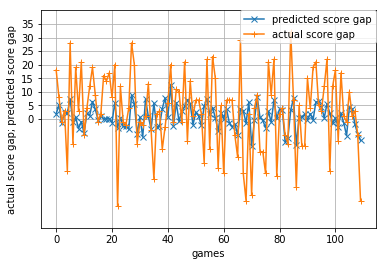

In [9]:
# Visulization of prediction 
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(0,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)